In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [2]:
base_path = '/Users/bordonis/ResearchActivities/Perovskite/OpticalMeasurements/Luminescence/'

In [3]:
#file_Lumi = os.path.join(base_path,'PL_20280829.csv')


#df_Lumi = pd.read_csv(file_Lumi, sep=',', header=None, skiprows=2, names=['Omega', 'counts'] )
#df_Lumi.head()

file_Lumi = os.path.join(base_path,'PL_20280829.csv')

#df_Lumi = pd.read_csv(file_Lumi, sep=',', header=None, skiprows=2, names=['Omega', 'counts'])
df_Lumi = pd.read_csv(file_Lumi, sep=',', header=None, skiprows=2, names=['Entry', 'wl', 'BRO-ITC_SC67-A', 'BRO-ITC_SC67-B', 'CS104-A', 'CS106-A'])
df_SC67_A = df_Lumi[['Entry', 'wl', 'BRO-ITC_SC67-A']].copy()
df_SC67_A.set_index("Entry", inplace=True)
df_SC67_B = df_Lumi[['Entry', 'wl', 'BRO-ITC_SC67-B']].copy()
df_SC67_B.set_index("Entry", inplace=True)
df_CS104_A = df_Lumi[['Entry', 'wl', 'CS104-A']].copy()
df_CS104_A.set_index("Entry", inplace=True)
df_CS106_A = df_Lumi[['Entry', 'wl', 'CS106-A']].copy()
df_CS106_A.set_index("Entry", inplace=True)
df_Lumi.head()

,Entry,wl,BRO-ITC_SC67-A,BRO-ITC_SC67-B,CS104-A,CS106-A
0,0,433.18310,-0.005556,0.016667,0.005556,0.005556
1,1,433.23600,0.005556,0.016667,0.016667,0.005556
2,2,433.28888,0.005556,0.027778,0.016667,0.011111
3,3,433.34177,0.005556,0.027778,0.016667,0.016667
4,4,433.39465,0.005556,0.027778,0.016667,0.016667


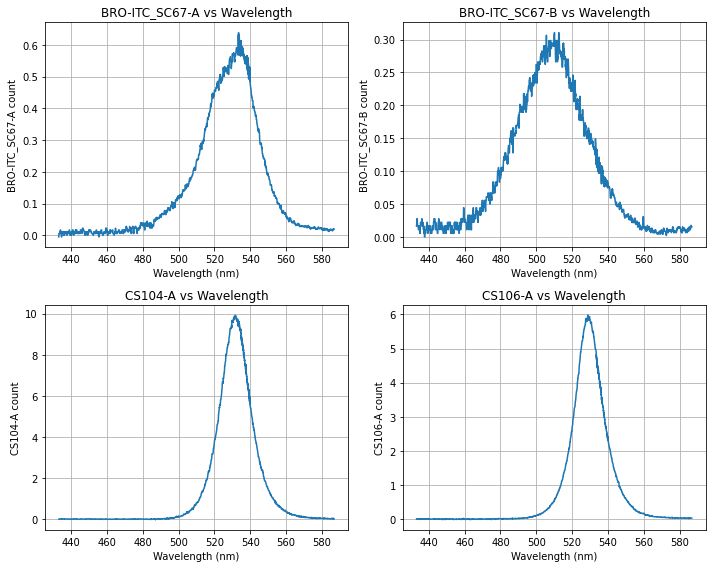

In [4]:
data = [
    ('BRO-ITC_SC67-A', 'BRO-ITC_SC67-A vs Wavelength'),
    ('BRO-ITC_SC67-B', 'BRO-ITC_SC67-B vs Wavelength'),
    ('CS104-A', 'CS104-A vs Wavelength'),
    ('CS106-A', 'CS106-A vs Wavelength'),
]

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax_flat = ax.flatten()

for i, (crystal, title) in enumerate(data):
    ax_flat[i].plot(df_Lumi['wl'], df_Lumi[crystal])
    ax_flat[i].set_title(title)
    ax_flat[i].set_xlabel('Wavelength (nm)')
    ax_flat[i].set_ylabel(crystal + ' count')
    ax_flat[i].grid()

plt.tight_layout()

plt.show()

In [15]:
def plotLumi(ax1, dfA, dfB, crystaltype, labelA, labelB, cA, cB):
    #fig = plt.figure(figsize=(35,20))
    #ax1 = fig.add_subplot(111)
    ax1.set_xlabel("$λ$ (nm)", fontsize=30)
    ax1.tick_params(axis='x', labelsize=30)
    ax1.set_ylabel("counts (a.u.)", fontsize=30)
    ax1.tick_params(axis='y', labelsize=30)
    ax1.set_title(crystaltype, fontsize=40)
    #ax1.set_yscale('log')
    #ax1.grid(True)
    ax1.plot(dfA['wl'], dfA['count'], label=labelA, c=cA, linewidth=3)
    ax1.plot(dfB['wl'], dfB['count'], label=labelB, c=cB, linewidth=2)
    #ax1.set_xlim(dfA['wl'].min() - 20, dfA['wl'].max() + 20)
    ax1.legend(fontsize="30", frameon=False)

    #plt.show()
    return ax1

In [6]:
df_SC67_A.rename(columns={'BRO-ITC_SC67-A': 'count'}, inplace=True)
df_SC67_B.rename(columns={'BRO-ITC_SC67-B': 'count'}, inplace=True)
df_CS104_A.rename(columns={'CS104-A': 'count'}, inplace=True)
df_CS106_A.rename(columns={'CS106-A': 'count'}, inplace=True)

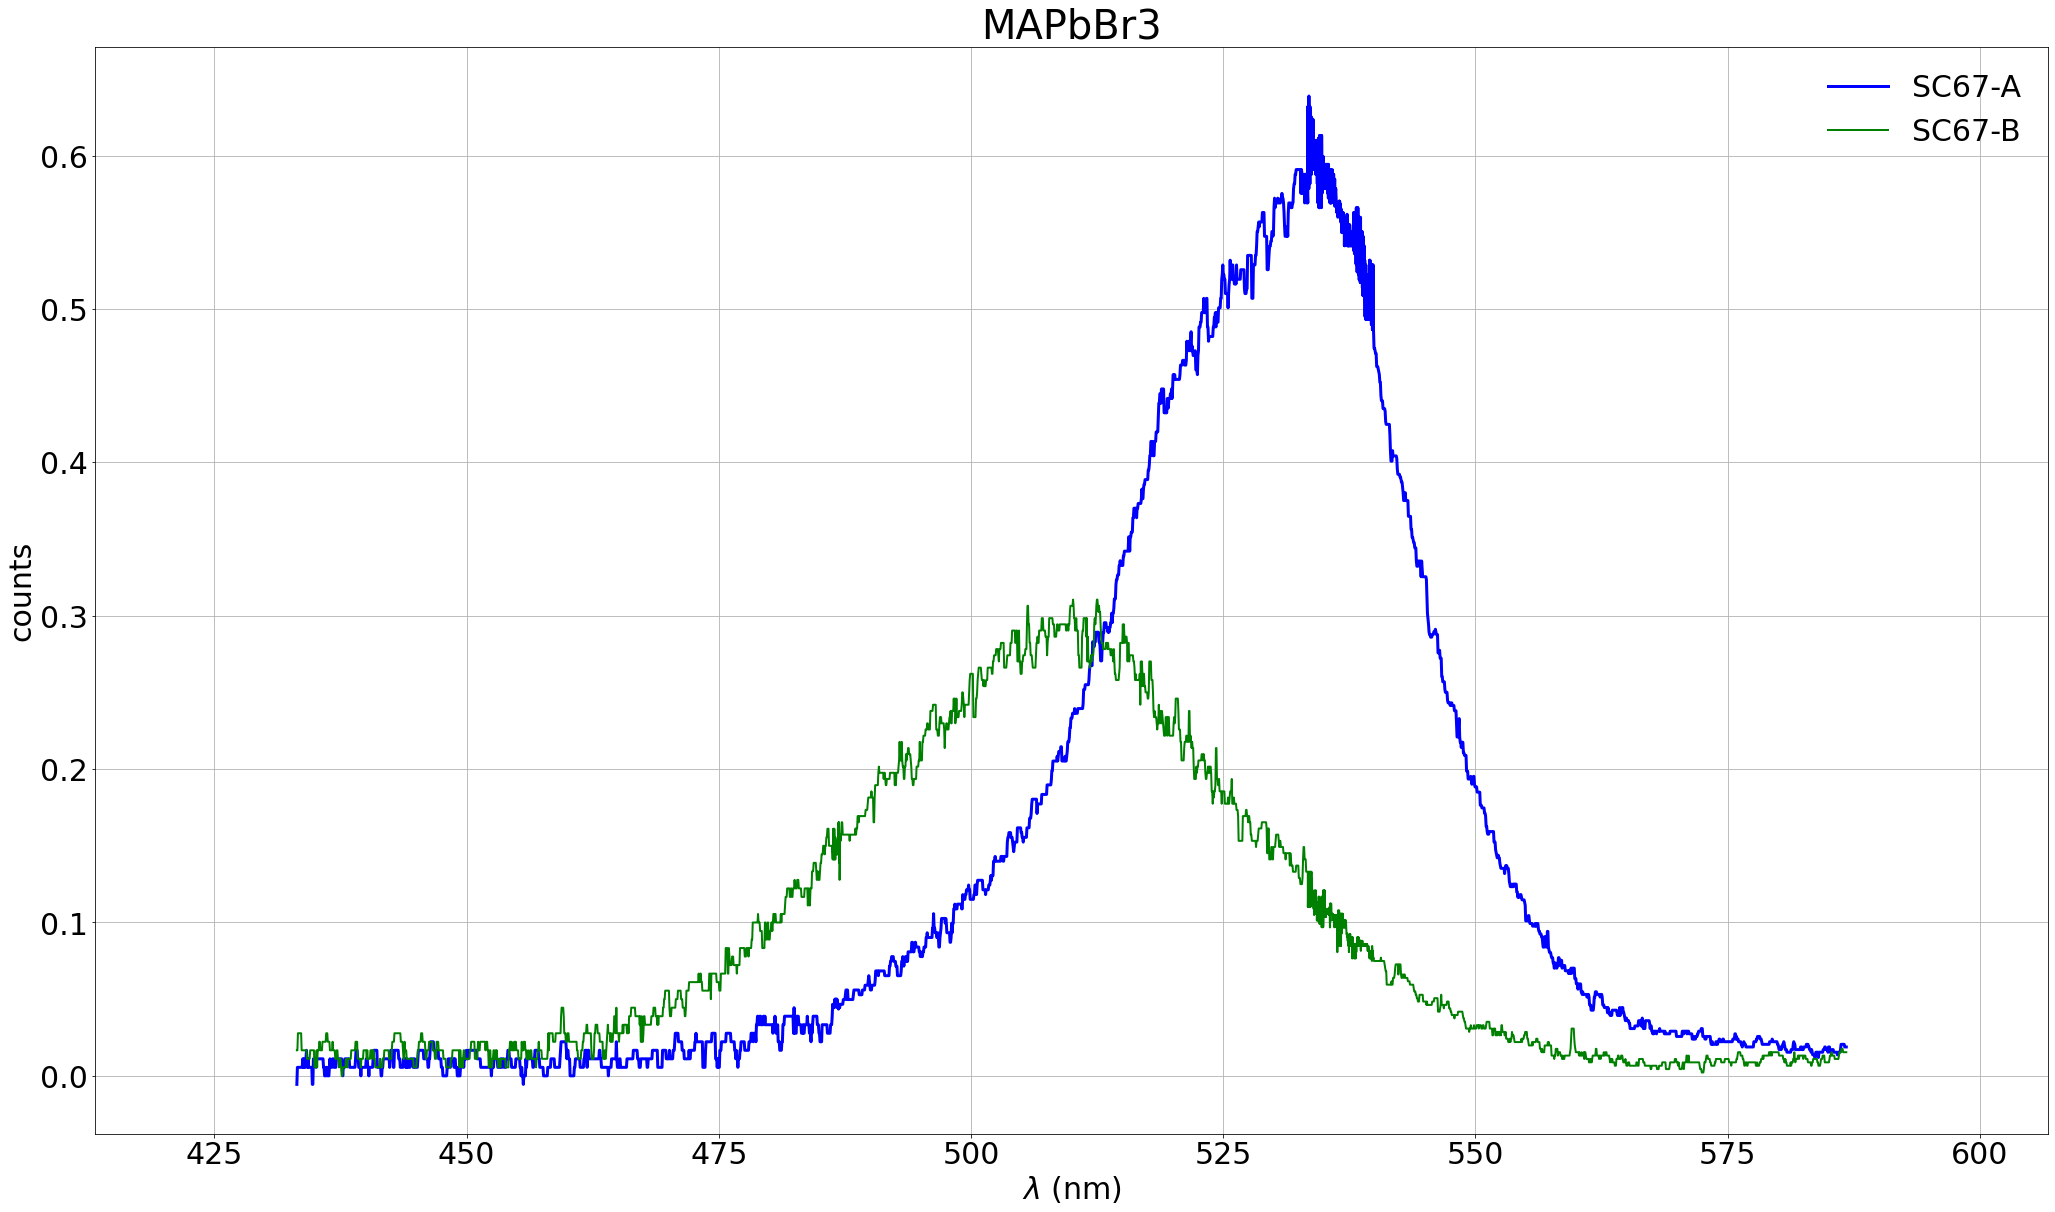

In [7]:
fig = plt.figure(figsize=(35,20))
ax1 = fig.add_subplot(111)
ax = plotLumi(ax1, df_SC67_A, df_SC67_B, 'MAPbBr3', 'SC67-A', 'SC67-B', 'Blue', 'green')

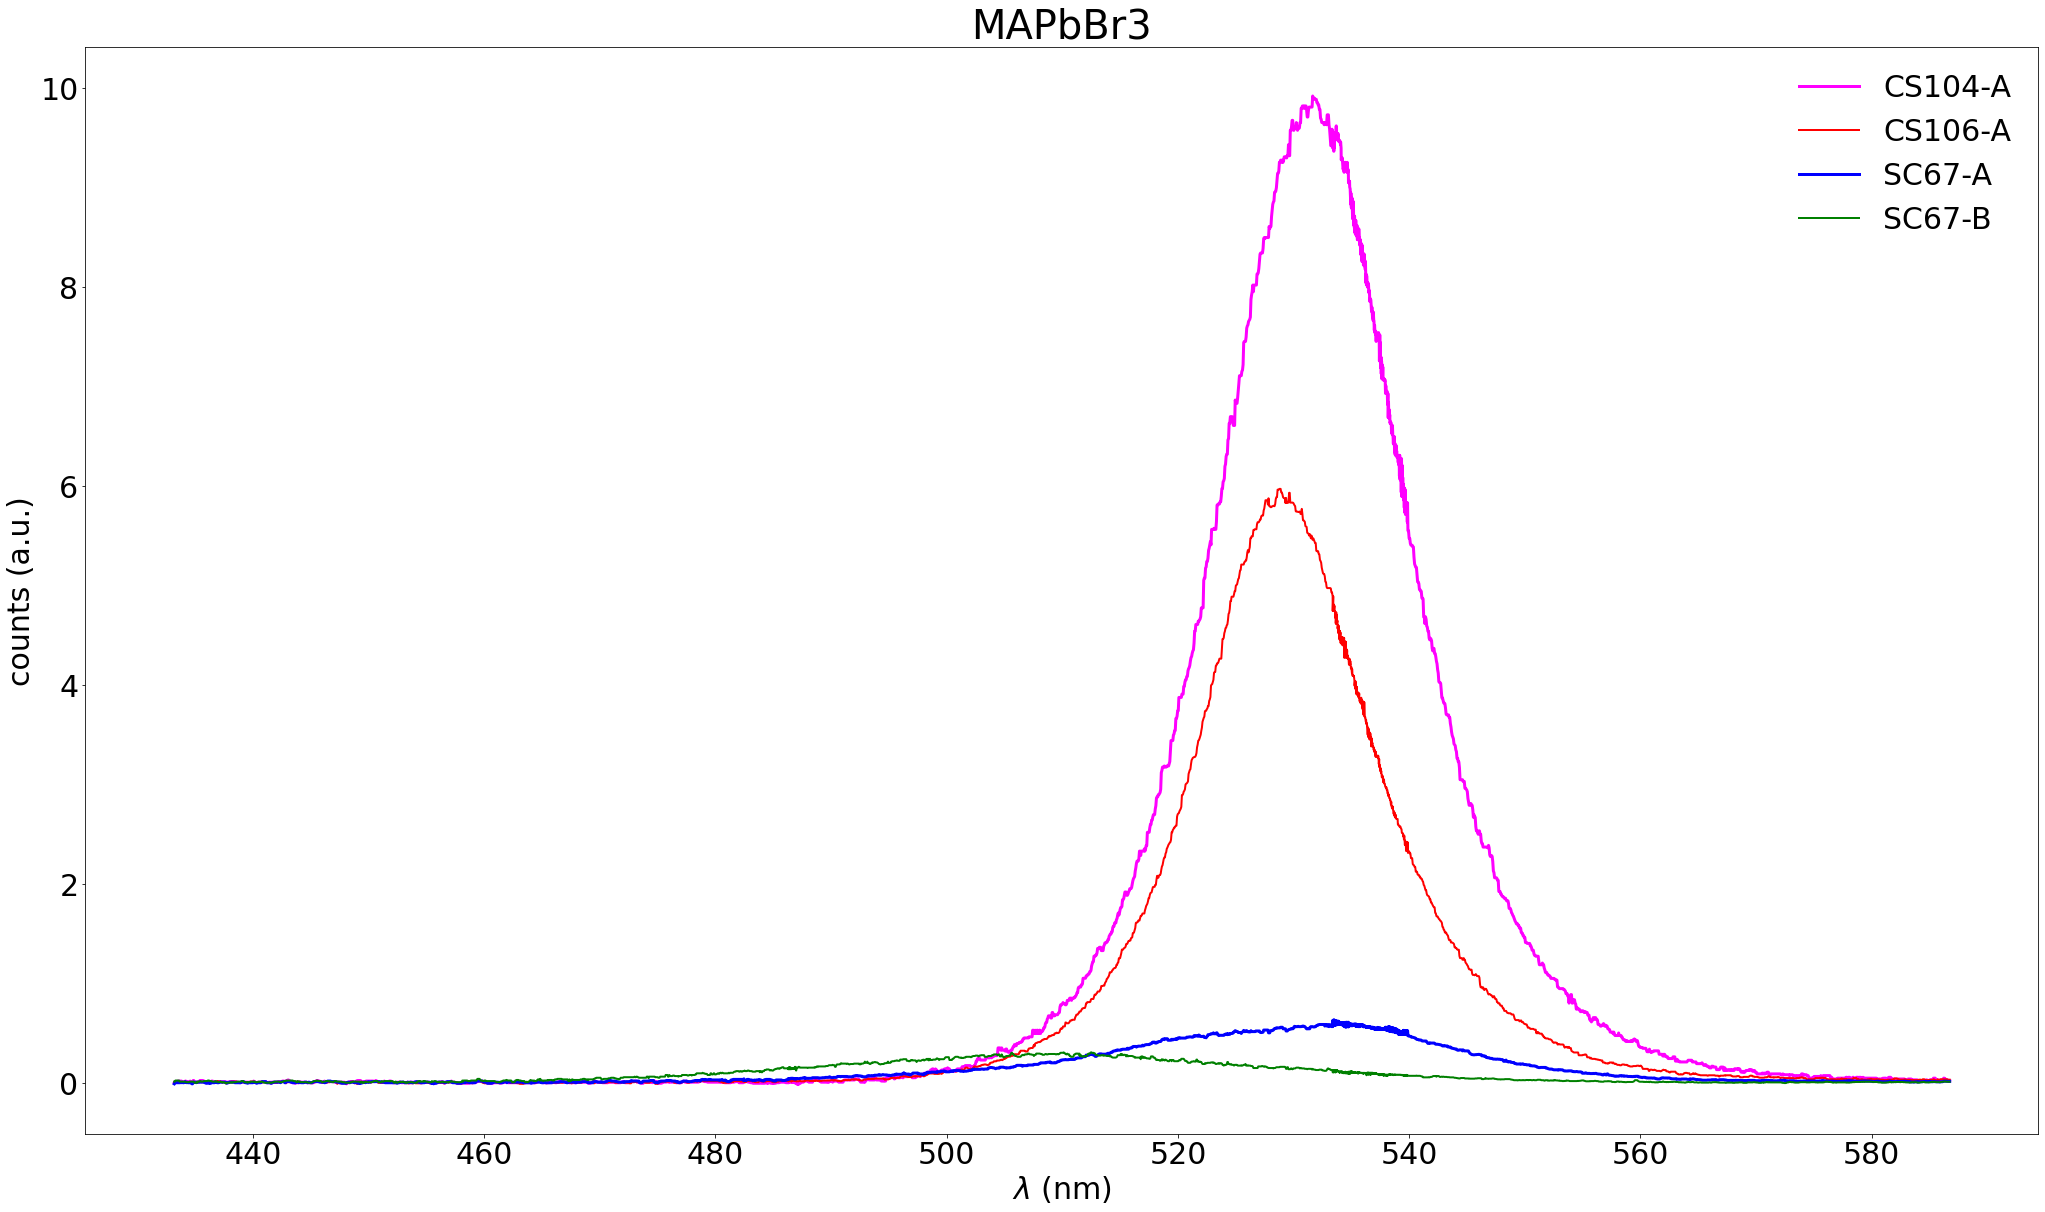

In [16]:
fig = plt.figure(figsize=(35,20))
ax1 = fig.add_subplot(111)
ax = plotLumi(ax1, df_CS104_A, df_CS106_A, 'CSPbBr3', 'CS104-A', 'CS106-A', 'magenta','r')
ax = plotLumi(ax1, df_SC67_A, df_SC67_B, 'MAPbBr3', 'SC67-A', 'SC67-B', 'Blue', 'green')
